<a href="https://colab.research.google.com/github/imvickykumar999/Fyers-Trading-Bot/blob/main/Fyers_Trading_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata

access_token = userdata.get('access_token')
client_id = userdata.get('client_id')
secret_key = userdata.get('secret_key')
FY_ID = userdata.get('FY_ID')
TOTP_KEY = userdata.get('TOTP_KEY')
PIN = userdata.get('PIN')

In [2]:
import requests

def construct_url(base_url, **params):
    url = base_url + "?"
    url += "&".join([f"{key}={value}" for key, value in params.items()])
    return url

In [3]:
def postman_request(endpoint='profile', **params):
    base_url = f"https://api-t1.fyers.in/api/v3/{endpoint}"
    url = construct_url(base_url, **params)
    headers = {
        "Authorization": f"{client_id}:{access_token}"
    }

    response = requests.get(
        url,
        headers=headers
    )

    if response.status_code == 200:
        return response.json()
    else:
        print("Failed with status code:", response.status_code)
        return response.text

# [Profile](https://myapi.fyers.in/docsv3#tag/User/paths/~1User/post)

| **Attribute**         | **Data Type** | **Description**                                      |
|-----------------------|---------------|------------------------------------------------------|
| **name**              | string        | Name of the client                                   |
| **display_name**      | string        | Display name, if any, provided by the client         |
| **fy_id**             | string        | The client ID of the Fyers user                      |
| **image**             | string        | URL link to the user’s profile picture, if any       |
| **email_id**          | string        | Email address of the client                          |
| **pan**               | string        | PAN of the client                                    |
| **pin_change_date**   | string        | Date when last PIN was updated                       |
| **pwd_change_date**   | string        | Date when last password was updated                  |
| **mobile_number**     | string        | Registered mobile number                             |
| **totp**              | boolean       | Status of TOTP                                       |
| **pwd_to_expire**     | int           | Number of days until the current password expires    |


In [4]:
postman_request()

{'s': 'ok',
 'code': 200,
 'message': '',
 'data': {'fy_id': 'YP11263',
  'name': 'PRIYANKA GUPTA',
  'image': 'https://myaccount-docs-prod.fyers.in/Profile_Picture/wsCmpmBOb12Czqt2.jpeg',
  'display_name': None,
  'pin_change_date': '06-06-2024 15:39:48',
  'email_id': 'gpriyanka0303@gmail.com',
  'pwd_change_date': None,
  'PAN': '---------',
  'mobile_number': '6306835094',
  'totp': True,
  'pwd_to_expire': 90}}

# Funds

| **Attribute**       | **Data Type** | **Description**                                             |
|---------------------|---------------|-------------------------------------------------------------|
| **id**              | int           | Unique identity for a particular fund                       |
| **title**           | string        | Each title represents a heading of the ledger               |
| **equityAmount**    | float         | The amount in the capital ledger for the above-mentioned title |
| **commodityAmount** | float         | The amount in the commodity ledger for the above-mentioned title |


In [5]:
postman_request('funds')

{'code': 200,
 'message': '',
 's': 'ok',
 'fund_limit': [{'id': 1,
   'title': 'Total Balance',
   'equityAmount': 50,
   'commodityAmount': 0},
  {'id': 2,
   'title': 'Utilized Amount',
   'equityAmount': 4.235164736271502e-24,
   'commodityAmount': 0},
  {'id': 3,
   'title': 'Clear Balance',
   'equityAmount': 50,
   'commodityAmount': 0},
  {'id': 4,
   'title': 'Realized Profit and Loss',
   'equityAmount': 0,
   'commodityAmount': 0},
  {'id': 5, 'title': 'Collaterals', 'equityAmount': 0, 'commodityAmount': 0},
  {'id': 6, 'title': 'Fund Transfer', 'equityAmount': 0, 'commodityAmount': 0},
  {'id': 7, 'title': 'Receivables', 'equityAmount': 0, 'commodityAmount': 0},
  {'id': 8, 'title': 'Adhoc Limit', 'equityAmount': 0, 'commodityAmount': 0},
  {'id': 9,
   'title': 'Limit at start of the day',
   'equityAmount': 50,
   'commodityAmount': 0},
  {'id': 10,
   'title': 'Available Balance',
   'equityAmount': 50,
   'commodityAmount': 0}]}

# Holdings

| **Attribute**                | **Data Type** | **Description**                                                        |
|------------------------------|---------------|------------------------------------------------------------------------|
| **symbol**                   | string        | Eg: NSE:RCOM-EQ                                                        |
| **holdingType**              | string        | Identify the type of holding                                           |
| **quantity**                 | int           | The quantity of the symbol which the user has at the beginning of the day |
| **remainingQuantity**        | int           | This reflects the quantity - the quantity sold during the day           |
| **pl**                       | float         | Profit and loss made                                                   |
| **costPrice**                | float         | The original buy price of the holding                                  |
| **marketVal**                | float         | The Market value of the current holding                                |
| **ltp**                      | float         | LTP is the price from which the next sale of the stocks happens         |
| **id**                       | int           | The unique value for each holding                                      |
| **fytoken**                  | string        | Fytoken is a unique identifier for every symbol.                       |
| **exchange**                 | int           | The exchange in which order is placed.                                 |
| **segment**                  | int           | The segment in which the holding is taken.                             |
| **isin**                     | string        | Unique ISIN provided by exchange for each symbol                       |
| **qty_t1**                   | int           | Quantity t+1 day                                                       |
| **remainingPledgeQuantity**  | int           | Remaining Pledged quantity                                             |
| **collateralQuantity**       | int           | Pledged quantity                                                       |


In [6]:
postman_request('holdings')

{'code': 200,
 'message': '',
 's': 'ok',
 'overall': {'count_total': 0,
  'pnl_perc': 0,
  'total_current_value': 0,
  'total_investment': 0,
  'total_pl': 0},
 'holdings': []}

# Transaction Info

| **Attribute**         | **Data Type** | **Description**                                                                                |
|-----------------------|---------------|------------------------------------------------------------------------------------------------|
| **id**                | string        | The unique order id assigned for each order                                                    |
| **exchOrdId**         | string        | The order id provided by the exchange                                                          |
| **symbol**            | string        | The symbol for which order is placed                                                           |
| **qty**               | int           | The original order quantity                                                                    |
| **remainingQuantity** | int           | The remaining quantity                                                                         |
| **filledQty**         | int           | The filled quantity after partial trades                                                       |
| **status**            | int           | 1 => Canceled<br>2 => Traded / Filled<br>3 => (Not used currently)<br>4 => Transit<br>5 => Rejected<br>6 => Pending<br>7 => Expired |
| **slNo**              | int           | This is used to sort the orders based on the time                                              |
| **message**           | string        | The error messages are shown here                                                              |
| **segment**           | int           | 10 => E (Equity)<br>11 => D (F&O)<br>12 => C (Currency)<br>20 => M (Commodity)                |
| **limitPrice**        | float         | The limit price for the order                                                                  |
| **stopPrice**         | float         | The stop price for the order                                                                   |
| **productType**       | string        | The product type                                                                               |
| **type**              | int           | 1 => Limit Order<br>2 => Market Order<br>3 => Stop Order (SL-M)<br>4 => Stoplimit Order (SL-L) |
| **side**              | int           | 1 => Buy<br>-1 => Sell                                                                         |
| **disclosedQty**      | int           | Disclosed quantity                                                                             |
| **orderValidity**     | string        | DAY<br>IOC                                                                                     |
| **orderDateTime**     | string        | The order time as per DD-MMM-YYYY hh:mm:ss in IST                                              |
| **parentId**          | string        | The parent order id will be provided only for applicable orders (e.g., BO Leg 2 & 3 and CO Leg 2) |
| **tradedPrice**       | float         | The average traded price for the order                                                         |
| **source**            | string        | Source from where the order was placed                                                         |
| **fytoken**           | string        | Fytoken is a unique identifier for every symbol                                                |
| **offlineOrder**      | boolean       | False => When market is open<br>True => When placing AMO order                                 |
| **pan**               | string        | PAN of the client                                                                              |
| **clientId**          | string        | The client id of the Fyers user                                                                |
| **exchange**          | int           | The exchange in which order is placed                                                          |
| **instrument**        | int           | Exchange instrument type                                                                       |
| **discloseQty**       | int           | Disclosed quantity                                                                             |
| **orderTag**          | string        | Order tag provided when placing the order. Note: <br><br>1: will be concatenated at the start of the tag provided by the user. <br>2: will be concatenated at the start of the tag generated internally by Fyers. <br><br>Default value if tag not provided when order is placed is 2:Untagged |


In [7]:
postman_request('orders')

{'code': 200,
 'message': '',
 's': 'ok',
 'orderBook': [{'clientId': 'YP11263',
   'exchange': 10,
   'fyToken': '101000000014366',
   'id': '24062700175522',
   'instrument': 0,
   'offlineOrder': False,
   'source': 'API',
   'status': 5,
   'type': 1,
   'pan': 'DGHPG5874E',
   'limitPrice': 7.9,
   'productType': 'INTRADAY',
   'qty': 1,
   'disclosedQty': 0,
   'remainingQuantity': 0,
   'segment': 10,
   'symbol': 'NSE:IDEA-EQ',
   'description': 'VODAFONE IDEA LIMITED',
   'ex_sym': 'IDEA',
   'orderDateTime': '27-Jun-2024 10:37:36',
   'side': 1,
   'orderValidity': 'DAY',
   'stopPrice': 0,
   'tradedPrice': 0,
   'filledQty': 0,
   'exchOrdId': '',
   'message': 'RED:RULE:{Check circuit limit including square off order}Current:INR 7.90 LowerCircuit:INR 16.21 UpperCircuit:INR 19.82:NSE.IDEA-EQ for C-YP11263 [FYERS_RISK_CUG]',
   'ch': 0.66,
   'chp': 3.662597114317425,
   'lp': 18.68,
   'orderNumStatus': '24062700175522:5',
   'slNo': 1,
   'orderTag': '2:Untagged'},
  {'cli

In [8]:
postman_request('orders', id='24062700302186')

{'code': 200,
 'message': '',
 's': 'ok',
 'orderBook': [{'clientId': 'YP11263',
   'exchange': 10,
   'fyToken': '101000000013745',
   'id': '24062700302186',
   'instrument': 0,
   'offlineOrder': False,
   'source': 'API',
   'status': 1,
   'type': 1,
   'pan': 'DGHPG5874E',
   'limitPrice': 3.11,
   'productType': 'CNC',
   'qty': 1,
   'disclosedQty': 0,
   'remainingQuantity': 0,
   'segment': 10,
   'symbol': 'NSE:GTLINFRA-EQ',
   'description': 'GTL INFRA.LTD',
   'ex_sym': 'GTLINFRA',
   'orderDateTime': '27-Jun-2024 13:02:57',
   'side': 1,
   'orderValidity': 'DAY',
   'stopPrice': 0,
   'tradedPrice': 0,
   'filledQty': 0,
   'exchOrdId': '1100000034158101',
   'message': '',
   'ch': 0,
   'chp': 0,
   'lp': 0,
   'orderNumStatus': '24062700302186:1',
   'slNo': 1,
   'orderTag': '2:Untagged'}]}

In [9]:
postman_request('orders', order_tag='2:Untagged')

{'code': 200,
 'message': '',
 's': 'ok',
 'orderBook': [{'clientId': 'YP11263',
   'exchange': 10,
   'fyToken': '101000000014366',
   'id': '24062700175522',
   'instrument': 0,
   'offlineOrder': False,
   'source': 'API',
   'status': 5,
   'type': 1,
   'pan': 'DGHPG5874E',
   'limitPrice': 7.9,
   'productType': 'INTRADAY',
   'qty': 1,
   'disclosedQty': 0,
   'remainingQuantity': 0,
   'segment': 10,
   'symbol': 'NSE:IDEA-EQ',
   'description': 'VODAFONE IDEA LIMITED',
   'ex_sym': 'IDEA',
   'orderDateTime': '27-Jun-2024 10:37:36',
   'side': 1,
   'orderValidity': 'DAY',
   'stopPrice': 0,
   'tradedPrice': 0,
   'filledQty': 0,
   'exchOrdId': '',
   'message': 'RED:RULE:{Check circuit limit including square off order}Current:INR 7.90 LowerCircuit:INR 16.21 UpperCircuit:INR 19.82:NSE.IDEA-EQ for C-YP11263 [FYERS_RISK_CUG]',
   'ch': 0,
   'chp': 0,
   'lp': 0,
   'orderNumStatus': '24062700175522:5',
   'slNo': 1,
   'orderTag': '2:Untagged'},
  {'clientId': 'YP11263',
   '

# Positions

| **Attribute**          | **Data Type** | **Description**                                                                               |
|------------------------|---------------|-----------------------------------------------------------------------------------------------|
| **symbol**             | string        | Eg: NSE:SBIN-EQ                                                                               |
| **id**                 | string        | The unique value for each position                                                            |
| **buyAvg**             | float         | Average buy price                                                                             |
| **buyQty**             | int           | Total buy quantity                                                                            |
| **sellAvg**            | float         | Average sell price                                                                            |
| **sellQty**            | int           | Total sell quantity                                                                           |
| **netAvg**             | float         | netAvg                                                                                        |
| **netQty**             | int           | Net quantity                                                                                  |
| **side**               | int           | The side shows whether the position is long / short                                           |
| **qty**                | int           | Absolute value of net quantity                                                                |
| **productType**        | string        | The product type of the position                                                              |
| **realized_profit**    | float         | The realized profit and loss of the position                                                  |
| **pl**                 | float         | The total profit and loss of the position                                                     |
| **crossCurrency**      | string        | Y => It is cross currency position<br>N => It is not a cross currency position                |
| **rbiRefRate**         | float         | In case of cross currency position, the RBI reference rate required to calculate the profit and loss |
| **qtyMulti_com**       | float         | In case of commodity positions, this multiplier is required for profit and loss calculation   |
| **segment**            | int           | The segment in which the position is taken                                                    |
| **exchange**           | int           | The exchange in which the position is taken                                                   |
| **slNo**               | int           | This is used for sorting of positions                                                         |
| **ltp**                | float         | LTP is the price from which the next sale of the stocks happens                               |
| **fytoken**            | string        | Fytoken is a unique identifier for every symbol                                               |
| **cfBuyQty**           | int           | Carry forward buy quantity                                                                    |
| **cfSellQty**          | int           | Carry forward sell quantity                                                                   |
| **dayBuyQty**          | int           | Day forward buy quantity                                                                      |
| **daySellQty**         | int           | Day forward sell quantity                                                                     |
| **exchange**           | int           | The exchange in which order is placed                                                         |


In [10]:
postman_request('positions')

{'code': 200,
 'message': '',
 's': 'ok',
 'netPositions': [],
 'overall': {'count_open': 0,
  'count_total': 0,
  'pl_realized': 0,
  'pl_total': 0,
  'pl_unrealized': 0}}

# Trades

| **Attribute**       | **Data Type** | **Description**                                                                                                   |
|---------------------|---------------|-------------------------------------------------------------------------------------------------------------------|
| **symbol**          | string        | Eg: NSE:SBIN-EQ                                                                                                   |
| **row**             | int           | The unique value to sort the trades                                                                               |
| **orderDateTime**   | string        | The time when the trade occurred in “DD-MM-YYYY hh:mm:ss” format in IST                                            |
| **orderNumber**     | string        | The order id for which the trade occurred                                                                         |
| **tradeNumber**     | string        | The trade number generated by the exchange                                                                        |
| **tradePrice**      | float         | The traded price                                                                                                  |
| **tradeValue**      | float         | The total traded value                                                                                            |
| **tradedQty**       | int           | The total traded quantity                                                                                         |
| **side**            | int           | 1 => Buy<br>-1 => Sell                                                                                            |
| **productType**     | string        | The product in which the order was placed                                                                         |
| **exchangeOrderNo** | string        | The order number provided by the exchange                                                                         |
| **segment**         | int           | The segment in which the order is placed                                                                          |
| **exchange**        | int           | The exchange in which the order is placed                                                                         |
| **fyToken**         | string        | Fytoken is a unique identifier for every symbol                                                                   |
| **orderTag**        | string        | Order tag provided when placing the order. Note: <br><br>1: will be concatenated at the start of the tag provided by user.<br>2: will be concatenated at the start of the tag generated internally by Fyers. <br><br>Default value if tag not provided when order is placed is 1:Untagged |


In [11]:
postman_request('tradebook')

{'code': 200, 'message': '', 's': 'ok', 'tradeBook': []}

## Product Types Explained

---

1. **Intraday**:
   - Orders bought and sold the same day.
   - Order types: Market, Limit, Stop, and Stop Limit.

2. **CNC (Cash and Carry)**:
   - Orders carried forward to the next day.
   - Order types: Market, Limit, Stop, and Stop Limit.

3. **Margin**:
   - Derivative contracts carried forward.
   - Order types: Market, Limit, Stop, and Stop Limit.

4. **Cover Order (CO)**:
   - Mandatory stopLoss input.
   - Order types: Market or Limit.
   - Validity: DAY.
   - Disclosed quantity: 0.

5. **Bracket Order (BO)**:
   - Mandatory stopLoss and takeProfit inputs.
   - Order types: Market, Limit, Stop, or Stop Limit.
   - Validity: DAY.
   - Disclosed quantity: 0.

## Price Validations

---

- Prices must conform to exchange tick sizes.
- Tick size applies to Limit, Stop, StopLoss, and Target prices.
- Tick sizes are available in the symbol master.

# Order Placement

| **Attribute**      | **Data Type** | **Description**                                                                                     |
|--------------------|---------------|-----------------------------------------------------------------------------------------------------|
| **symbol***        | string        | Eg: NSE:SBIN-EQ                                                                                     |
| **qty***           | int           | The quantity should be in multiples of lot size for derivatives.                                    |
| **type***          | int           | 1 => Limit Order<br>2 => Market Order<br>3 => Stop Order (SL-M)<br>4 => Stoplimit Order (SL-L)      |
| **side***          | int           | 1 => Buy<br>-1 => Sell                                                                              |
| **productType***   | string        | CNC => For equity only<br>INTRADAY => Applicable for all segments.<br>MARGIN => Applicable only for derivatives<br>CO => Cover Order<br>BO => Bracket Order |
| **limitPrice***    | float         | Default => 0<br>Provide valid price for Limit and Stoplimit orders                                  |
| **stopPrice***     | float         | Default => 0<br>Provide valid price for Stop and Stoplimit orders                                   |
| **disclosedQty***  | int           | Default => 0<br>Allowed only for Equity                                                             |
| **validity***      | string        | IOC => Immediate or Cancel<br>DAY => Valid till the end of the day                                  |
| **offlineOrder***  | boolean       | False => When market is open<br>True => When placing AMO order                                      |
| **stopLoss***      | float         | Default => 0<br>Provide valid price for CO and BO orders                                            |
| **takeProfit***    | float         | Default => 0<br>Provide valid price for BO orders                                                   |
| **orderTag**       | string        | (Optional) Tag you want to assign to the specific order                                             |


In [12]:
!pip install fyers-apiv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.4/497.4 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 16.4 MB/s eta 0:00:00
  Created wheel for tornado: filename=tornado-6.1-cp310-cp310-linux_x86_64.whl size=421979 sha256=84c5ce012eea6524b96f7e3c14cbdac59cd2d1373b17a4159e529440a45b597f
  Stored in directory: /root/.cache/pip/wheels/80/32/8d/21cf0fa6ee4e083f6530e5b83dfdfa9489a3890d320803f4

In [13]:
from fyers_api import accessToken

In [14]:
from fyers_api import fyersModel

In [15]:
fyers = fyersModel.FyersModel(token=access_token,is_async=False,client_id=client_id,log_path="")
help(fyers)

Help on FyersModel in module fyers_api.fyersModel object:

class FyersModel(builtins.object)
 |  FyersModel(is_async=False, client_id=None, token='', log_path='')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, is_async=False, client_id=None, token='', log_path='')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cancel_basket_orders(self, data)
 |  
 |  cancel_order(self, data)
 |  
 |  convert_position(self, data)
 |  
 |  create_timestamp(self)
 |  
 |  depth(self, data=None)
 |  
 |  exit_positions(self, data=None)
 |  
 |  funds(self, data=None)
 |  
 |  generate_data_token(self, data)
 |  
 |  get_orders(self, data)
 |  
 |  get_profile(self)
 |  
 |  history(self, data=None)
 |  
 |  holdings(self, data=None)
 |  
 |  market_status(self)
 |  
 |  minquantity(self)
 |  
 |  modify_basket_orders(self, data)
 |  
 |  modify_order(self, data)
 |  
 |  orderbook(self, data=None)
 |  
 |  place_basket_orders(self, data)
 |  
 |  place_order(self, 

In [16]:
from pprint import pprint as p

"""
1. User Apis : This includes (Profile,Funds,Holdings)
"""

p(fyers.get_profile())  ## This will provide us with the user related data

{'code': 200,
 'data': {'PAN': '---------',
          'display_name': None,
          'email_id': 'gpriyanka0303@gmail.com',
          'fy_id': 'YP11263',
          'image': 'https://myaccount-docs-prod.fyers.in/Profile_Picture/wsCmpmBOb12Czqt2.jpeg',
          'mobile_number': '6306835094',
          'name': 'PRIYANKA GUPTA',
          'pin_change_date': '06-06-2024 15:39:48',
          'pwd_change_date': None,
          'pwd_to_expire': 90,
          'totp': True},
 'message': '',
 's': 'ok'}


In [17]:
p(fyers.funds())        ## This will provide us with the funds the user has

{'code': 200,
 'fund_limit': [{'commodityAmount': 0,
                 'equityAmount': 50,
                 'id': 3,
                 'title': 'Clear Balance'},
                {'commodityAmount': 0,
                 'equityAmount': 50,
                 'id': 1,
                 'title': 'Total Balance'},
                {'commodityAmount': 0,
                 'equityAmount': 0,
                 'id': 7,
                 'title': 'Receivables'},
                {'commodityAmount': 0,
                 'equityAmount': 0,
                 'id': 4,
                 'title': 'Realized Profit and Loss'},
                {'commodityAmount': 0,
                 'equityAmount': 4.235164736271502e-24,
                 'id': 2,
                 'title': 'Utilized Amount'},
                {'commodityAmount': 0,
                 'equityAmount': 0,
                 'id': 5,
                 'title': 'Collaterals'},
                {'commodityAmount': 0,
                 'equityAmount': 0,
          

In [18]:
p(fyers.holdings())    ## This will provide the available holdings the user has

{'code': 200,
 'holdings': [],
 'message': '',
 'overall': {'count_total': 0,
             'pnl_perc': 0,
             'pnl_perc_day': 0,
             'total_current_value': 0,
             'total_investment': 0,
             'total_pl': 0,
             'total_pl_day': 0},
 's': 'ok'}


In [19]:
"""
2. Transaction Apis : This includes (Tradebook,Orderbook,Positions)
"""

p(fyers.tradebook())   ## This will provide all the trade related information

{'code': 200, 'message': '', 's': 'ok', 'tradeBook': []}


In [20]:
p(fyers.orderbook())   ## This will provide the user with all the order realted information

{'code': 200,
 'message': '',
 'orderBook': [{'ch': 0.5,
                'chp': 2.774694783573807,
                'clientId': 'YP11263',
                'description': 'VODAFONE IDEA LIMITED',
                'discloseQty': 0,
                'disclosedQty': 0,
                'dqQtyRem': 0,
                'ex_sym': 'IDEA',
                'exchOrdId': '',
                'exchange': 10,
                'filledQty': 0,
                'fyToken': '101000000014366',
                'id': '24062700175522',
                'instrument': 0,
                'limitPrice': 7.9,
                'lp': 18.52,
                'message': 'RED:RULE:{Check circuit limit including square off '
                           'order}Current:INR 7.90 LowerCircuit:INR 16.21 '
                           'UpperCircuit:INR 19.82:NSE.IDEA-EQ for C-YP11263 '
                           '[FYERS_RISK_CUG]',
                'offlineOrder': False,
                'orderDateTime': '27-Jun-2024 10:37:36',
             

In [21]:
p(fyers.positions())   ## This will provide the user with all the positions the user has on his end

{'code': 200,
 'message': '',
 'netPositions': [],
 'overall': {'count_open': 0,
             'count_total': 0,
             'pl_realized': 0,
             'pl_total': 0,
             'pl_unrealized': 0},
 's': 'ok'}


In [23]:
"""
3. Order Placement  : This Apis helps to place order.
  There are two ways to place order
    a. single order : wherein you can fire one order at a time
    b. multi order : this is used to place a basket of order but the basket size can max be 10 symbols
"""

## SINGLE ORDER
data =  {
    "symbol": "NSE:GTLINFRA-EQ",
    "qty": 1,
    "type": 1,
    "side": 1,
    "productType": "CNC",
    "limitPrice": 3.00,
    "stopPrice": 0,
    "disclosedQty": 0,
    "validity": "DAY",
    "offlineOrder": True,
    "stopLoss": 0,
    "takeProfit": 0
}

## This is a sample example to place a limit order you can make the further changes based on your requriements
p(fyers.place_order(data))

{'code': -99, 'id': '', 'message': 'ORA:AMO is stopped', 's': 'error'}


In [24]:
## MULTI ORDER

data = [{ "symbol":"NSE:SBIN-EQ",
  "qty":1,
  "type":1,
  "side":1,
  "productType":"INTRADAY",
  "limitPrice":61050,
  "stopPrice":0 ,
  "disclosedQty":0,
  "validity":"DAY",
  "offlineOrder":"False",
  "stopLoss":0,
  "takeProfit":0
},
{
  "symbol":"NSE:HDFC-EQ",
  "qty":1,
  "type":2,
  "side":1,
  "productType":"INTRADAY",
  "limitPrice":0,
  "stopPrice":0 ,
  "disclosedQty":0,
  "validity":"DAY",
  "offlineOrder":"False",
  "stopLoss":0,
  "takeProfit":0
}]

### This takes input as a list containing multiple single order data into it and the execution of the orders goes in the same format as mentioned.
p(fyers.place_basket_orders(data))

{'code': 400,
 'data': [{'body': {'code': -99,
                    'id': '',
                    'message': "RED:'MIS' Orders are disallowed after system "
                               'square off',
                    's': 'error'},
           'statusCode': 400,
           'statusDescription': '400 Bad Request'},
          {'body': {'code': -300,
                    'id': '',
                    'message': 'Orders are not allowed in this symbol.',
                    's': 'error'},
           'statusCode': 400,
           'statusDescription': '400 Bad Request'}],
 'message': '',
 's': 'error'}


In [25]:
"""
4. Other Transaction : This includes (modify_order,exit_position,cancel_order,convert_positions)
"""

## Modify_order request
data = {
          "id":7574657627567,
          "type":1,
          "limitPrice": 61049,
          "qty":1
      }

p(fyers.modify_order(data))

{'code': -51,
 'id': '7574657627567',
 'message': 'invalid order id: 7574657627567',
 's': 'error'}


In [26]:
## Modify Multi Order

data = [
    { "id":8102710298291,
  "type":1,
  "limitPrice": 61049,
  "qty":0
},
{
  "id":8102710298292,
  "type":1,
  "limitPrice": 61049,
  "qty":1
}]

p(fyers.modify_basket_orders(data))

{'code': 400,
 'data': [{'body': {'code': -50,
                    'id': '8102710298291',
                    'message': 'qty: Must be greater than or equal to 1',
                    's': 'error'},
           'statusCode': 400,
           'statusDescription': '400 Bad Request'},
          {'body': {'code': -51,
                    'id': '8102710298292',
                    'message': 'invalid order id: 8102710298292',
                    's': 'error'},
           'statusCode': 400,
           'statusDescription': '400 Bad Request'}],
 'message': '',
 's': 'error'}


In [27]:
### Cancel_order
data = {"id":'808058117761'}
p(fyers.cancel_order(data))

{'code': -51,
 'id': '808058117761',
 'message': 'invalid order id: 808058117761',
 's': 'error'}


In [28]:
### cancel_multi_order
data  =  [
{
   "id":'808058117761'
 },
 {
   "id":'808058117762'
 }]

p(fyers.cancel_basket_orders(data))

{'code': 400,
 'data': [{'body': {'code': -51,
                    'id': '808058117761',
                    'message': 'invalid order id: 808058117761',
                    's': 'error'},
           'statusCode': 400,
           'statusDescription': '400 Bad Request'},
          {'body': {'code': -51,
                    'id': '808058117762',
                    'message': 'invalid order id: 808058117762',
                    's': 'error'},
           'statusCode': 400,
           'statusDescription': '400 Bad Request'}],
 'message': '',
 's': 'error'}


In [29]:
### Exit Position
data  = {
     "id":"NSE:SBIN-EQ-INTRADAY"
   }

p(fyers.exit_positions(data))

{'code': 1101, 'message': 'Looks like you have no open positions.', 's': 'ok'}


In [30]:
### Convert Position

data = {
     "symbol":"MCX:SILVERMIC20NOVFUT",
     "positionSide":1,
     "convertQty":1,
     "convertFrom":"INTRADAY",
     "convertTo":"CNC"
   }

p(fyers.convert_position(data))

{'code': '-310', 'message': 'Please provide a valid symbol', 's': 'error'}


In [31]:
"""
DATA APIS : This includes following Apis(History,Quotes,MarketDepth)
"""

## Historical Data

data = {
  'cont_flag': '1',
  'date_format': '0',
  'range_from': '1622097600',
  'range_to': '1622097685',
  'resolution': 'D',
  'symbol': 'NSE:SBIN-EQ'
}

p(fyers.history(data))

{'candles': [[1622073600, 413.7, 429.1, 412.0, 425.2, 73392997]], 's': 'ok'}


In [32]:
## Quotes

data = {"symbols":"NSE:SBIN-EQ"}
p(fyers.quotes(data))

{'code': 200,
 'd': [{'n': 'NSE:SBIN-EQ',
        's': 'ok',
        'v': {'ask': 0,
              'bid': 0,
              'ch': -1.35,
              'chp': -0.16,
              'description': 'NSE:SBIN-EQ',
              'exchange': 'NSE',
              'fyToken': '10100000003045',
              'high_price': 847.4,
              'low_price': 838.25,
              'lp': 844,
              'open_price': 843.9,
              'original_name': 'NSE:SBIN-EQ',
              'prev_close_price': 845.35,
              'short_name': 'SBIN-EQ',
              'spread': 0,
              'symbol': 'NSE:SBIN-EQ',
              'tt': '1719446400',
              'volume': 20372065}}],
 'message': '',
 's': 'ok'}


In [33]:
## Market Depth

data = {"symbol":"NSE:SBIN-EQ","ohlcv_flag":"1"}
p(fyers.depth(data))

{'d': {'NSE:SBIN-EQ': {'ask': [{'ord': 0, 'price': 0, 'volume': 0},
                               {'ord': 0, 'price': 0, 'volume': 0},
                               {'ord': 0, 'price': 0, 'volume': 0},
                               {'ord': 0, 'price': 0, 'volume': 0},
                               {'ord': 0, 'price': 0, 'volume': 0}],
                       'atp': 843.39,
                       'bids': [{'ord': 0, 'price': 0, 'volume': 0},
                                {'ord': 0, 'price': 0, 'volume': 0},
                                {'ord': 0, 'price': 0, 'volume': 0},
                                {'ord': 0, 'price': 0, 'volume': 0},
                                {'ord': 0, 'price': 0, 'volume': 0}],
                       'c': 845.35,
                       'ch': -1.35,
                       'chp': -0.16,
                       'expiry': '',
                       'h': 847.4,
                       'l': 838.25,
                       'lower_ckt': 760.85,
              

In [36]:
# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, token=access_token,is_async=False, log_path="")

data = {
    "symbol": "BSE:FRASER-X",
    "qty": 1,
    "type": 1,
    "side": 1,
    "productType": "CNC",
    "limitPrice": 3.91,
    "stopPrice": 0,
    "disclosedQty": 0,
    "validity": "DAY",
    "offlineOrder": True,
    "stopLoss": 0,
    "takeProfit": 0
}

response = fyers.place_order(data=data)
p(response)

{'code': -99, 'id': '', 'message': 'ORA:AMO is stopped', 's': 'error'}


### Key Parameters Explained:
- **symbol**: The ticker symbol of the stock (`NSE:IDEA-EQ` in this case).
- **qty**: The quantity of the stock to buy or sell.
- **type**: The type of order (1 for Limit Order).
- **side**: The side of the order (1 for Buy, -1 for Sell).
- **productType**: The type of product (INTRADAY in this case).
- **limitPrice**: The limit price for the order.
- **stopPrice**: The stop price for stop orders (set to 0 if not applicable).
- **disclosedQty**: The quantity to disclose to the market (0 means full quantity is disclosed).
- **validity**: The validity of the order (DAY means the order is valid for the trading day).
- **offlineOrder**: Indicates if the order is an AMO (After Market Order).
- **stopLoss**: The stop loss price for CO and BO orders (set to 0 if not applicable).
- **takeProfit**: The take profit price for BO orders (set to 0 if not applicable).

---

To understand the difference between a **limit order** and a **stop order**, especially in the context of prioritizing price over the speed of execution, let's delve into their definitions and functionalities:

### Limit Order

**Definition**: A limit order is an order to buy or sell a security at a specific price or better.

**Key Characteristics**:
- **Price Control**: Ensures the order will only be executed at the specified limit price or a better price (lower for buy orders, higher for sell orders).
- **Execution**: Not guaranteed to be executed if the market price does not reach the limit price. The priority is on the price, not the speed of execution.
- **Use Case**: Useful when you want to ensure that you do not pay more (for a buy) or receive less (for a sell) than the desired price. Suitable for less liquid stocks or when you have a specific target price in mind.

**Example**:
- You place a limit order to buy 100 shares at $45.

The order will only execute if the stock price drops to $45 or lower.

If the stock does not reach $45, the order remains unfilled.

### Stop Order (Stop-Loss Order)

**Definition**: A stop order becomes a market order once the stop price is reached. It is primarily used to limit losses or protect profits.

**Key Characteristics**:
- **Trigger Price**: The order is inactive until the stop price is reached. Once the stop price is hit, it becomes a market order and executes at the best available price.
- **Execution**: Execution is guaranteed once the stop price is reached, but the price at which it executes can be different from the stop price due to market conditions. The priority is on execution speed once triggered.
- **Use Case**: Useful for protecting against significant losses or locking in profits. Commonly used in volatile markets where price movements can be swift and substantial.

**Example**:
- You own a stock currently trading at $50.

You place a stop order to sell if the price drops to $45.

If the price hits $45,

the order converts to a market order and will sell at the next available price, which could be slightly above or below $45.

### Comparison in Terms of Price Priority and Speed

- **Limit Order**:
  - **Price Priority**: High. The order will only execute at the specified limit price or better.
  - **Speed of Execution**: Low. Execution is not guaranteed if the price does not reach the limit.

- **Stop Order**:
  - **Price Priority**: Low. Once the stop price is hit, the execution price can vary.
  - **Speed of Execution**: High. Converts to a market order and executes immediately once triggered.

### Example to Highlight Differences

Suppose you own a stock currently trading at $50:

- **Limit Order**:
  - You set a **sell limit order** at $55.
  
  The stock must rise to $55 for the order to execute.
  
  If it never reaches $55, the order remains unfilled.
  
  Here, the priority is getting the price you want ($55) rather than how quickly the order executes.

- **Stop Order**:
  - You set a **sell stop order** at $45.
  
  If the stock price falls to $45,
  
  the order becomes a market order and sells at the next available price.
  
  This might be $44.90 or,
  
  $44.50 depending on market conditions at the time. Here, the priority is on executing the order quickly to prevent further losses, rather than the exact price.

### Summary

- **Limit Order**: Prioritizes price over speed. It is ideal when you have a target price and can wait for the market to reach it.
- **Stop Order**: Prioritizes speed over price. It is ideal for protecting against significant losses by triggering a market order once the stop price is reached.

For further reading, you can refer to:
1. [Investopedia - Limit Order](https://www.investopedia.com/terms/l/limitorder.asp)
2. [Investopedia - Stop Order](https://www.investopedia.com/terms/s/stoporder.asp)

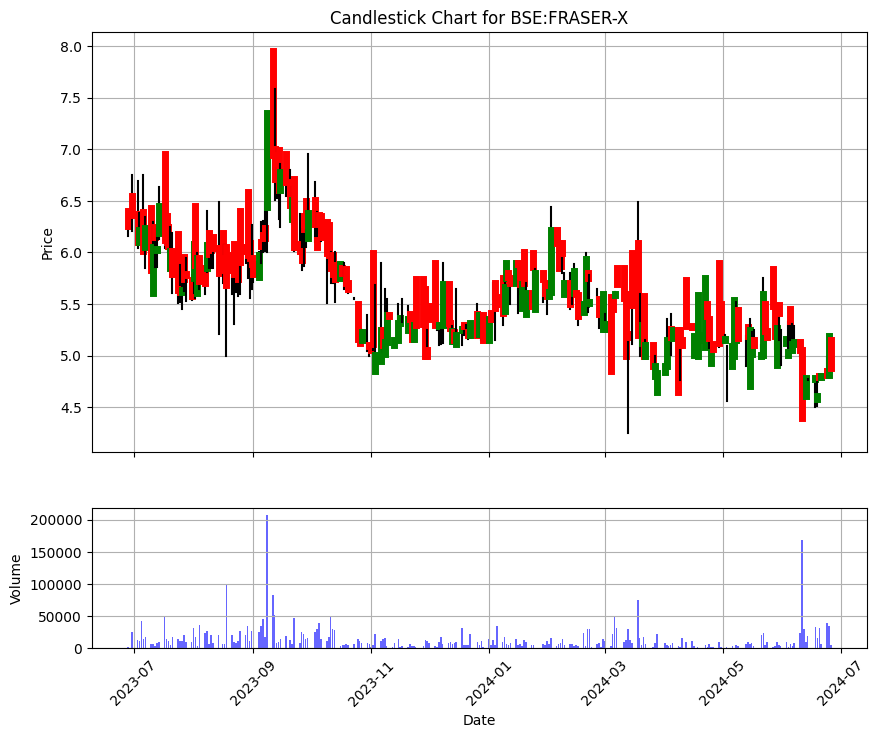

In [38]:
# Install necessary libraries if not already installed
# !pip install matplotlib pandas fyers-apiv2

import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime, timedelta
from fyers_api import fyersModel

# Replace with your actual client ID and access token
client_id = "2A6LCH4LF8-100"

access_token = userdata.get('access_token')
log_path = os.path.join(os.getcwd(), "fyers_logs")

# Create the directory if it doesn't exist
os.makedirs(log_path, exist_ok=True)

# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path=log_path)

# Define the date range for the last one year
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Convert the date range to Unix timestamps
range_from = int(start_date.timestamp())
range_to = int(end_date.timestamp())

# Define the data for the API request
symbol = "BSE:FRASER-X"

data = {
    "symbol": symbol,
    "resolution": "D",
    "date_format": "0",
    "range_from": str(range_from),
    "range_to": str(range_to),
    "cont_flag": "1"
}

# Fetch the historical data
response = fyers.history(data=data)
# print(response)

# Check if the response is successful
if response['s'] == 'ok':
    # Extract the candle data
    candles = response['candles']

    # Convert the response data to a DataFrame
    columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
    df = pd.DataFrame(candles, columns=columns)

    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

    # Plotting the candlestick chart with volume
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

    # Plotting the candlestick chart
    for index, row in df.iterrows():
        color = 'green' if row['close'] >= row['open'] else 'red'
        ax1.plot([row['timestamp'], row['timestamp']], [row['low'], row['high']], color='black')
        ax1.plot([row['timestamp'], row['timestamp']], [row['open'], row['close']], color=color, linewidth=5)

    # Plotting the volume chart
    ax2.bar(df['timestamp'], df['volume'], color='blue', alpha=0.6)

    # Add additional details to the title
    ax1.set_title(f'Candlestick Chart for {data["symbol"]}')
    ax1.set_ylabel('Price')
    ax2.set_ylabel('Volume')
    ax2.set_xlabel('Date')

    ax1.grid(True)
    ax2.grid(True)

    # Tilt the x-axis date labels
    plt.xticks(rotation=45)

    plt.show()
else:
    print("Failed to fetch data:", response)

In [39]:
import time
from fyers_api import fyersModel

# Replace with your actual client ID and access token
client_id = "2A6LCH4LF8-100"

# Initialize the FyersModel instance
fyers = fyersModel.FyersModel(client_id=client_id, token=access_token, is_async=False, log_path="")

# Define the symbol and buy order data
symbol = "BSE:FRASER-X"

buy_order_data = {
    "symbol": symbol,
    "qty": 1,
    "type": 1,  # Limit Order
    "side": 1,  # Buy
    "productType": "CNC",
    "limitPrice": 3.91,  # Upper Circuit Limit
    "stopPrice": 0,
    "disclosedQty": 0,
    "validity": "DAY",
    "offlineOrder": False,
    "stopLoss": 0,
    "takeProfit": 0
}

# Place the buy order
buy_order_response = fyers.place_order(buy_order_data)

print("Buy Order Response:")
p(buy_order_response)

# Check if the buy order was successful
if buy_order_response['s'] == 'ok':
    print("Buy order placed successfully. Waiting for order execution...")
else:
    print("Failed to place buy order:", buy_order_response)

Buy Order Response:
{'code': 1101,
 'id': '24062700548830',
 'message': 'Order Submitted Successfully. Your Order Ref. No. 24062700548830',
 's': 'ok'}
Buy order placed successfully. Waiting for order execution...


In [40]:
# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, token=access_token,is_async=False, log_path="")

orderId = "24062700548830"
data = {"id":orderId}

response = fyers.orderbook(data=data)
p(response)

{'code': 200,
 'message': '',
 'orderBook': [{'ch': 0.07,
                'chp': 1.4344262295081966,
                'clientId': 'YP11263',
                'description': 'Fraser And Company Limited',
                'discloseQty': 0,
                'disclosedQty': 0,
                'dqQtyRem': 0,
                'ex_sym': 'FRASER',
                'exchOrdId': '',
                'exchange': 12,
                'filledQty': 0,
                'fyToken': '1210000000539032',
                'id': '24062700548830',
                'instrument': 50,
                'limitPrice': 3.91,
                'lp': 4.95,
                'message': 'TRANSACTION NOT ALLOWED IN CURRENT INSTRUMENT '
                           'STATE [CLOSED]',
                'offlineOrder': False,
                'orderDateTime': '27-Jun-2024 15:50:45',
                'orderNumStatus': '24062700548830:5',
                'orderValidity': 'DAY',
                'pan': 'DGHPG5874E',
                'productType': 'C

In [41]:
# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, token=access_token,is_async=True, log_path="")

# Make a request to get the funds information
response = fyers.funds()
p(response)

<Future pending>


In [42]:
postman_request('funds')

{'code': 200,
 'message': '',
 's': 'ok',
 'fund_limit': [{'id': 1,
   'title': 'Total Balance',
   'equityAmount': 50,
   'commodityAmount': 0},
  {'id': 2,
   'title': 'Utilized Amount',
   'equityAmount': 4.235164736271502e-24,
   'commodityAmount': 0},
  {'id': 3,
   'title': 'Clear Balance',
   'equityAmount': 50,
   'commodityAmount': 0},
  {'id': 4,
   'title': 'Realized Profit and Loss',
   'equityAmount': 0,
   'commodityAmount': 0},
  {'id': 5, 'title': 'Collaterals', 'equityAmount': 0, 'commodityAmount': 0},
  {'id': 6, 'title': 'Fund Transfer', 'equityAmount': 0, 'commodityAmount': 0},
  {'id': 7, 'title': 'Receivables', 'equityAmount': 0, 'commodityAmount': 0},
  {'id': 8, 'title': 'Adhoc Limit', 'equityAmount': 0, 'commodityAmount': 0},
  {'id': 9,
   'title': 'Limit at start of the day',
   'equityAmount': 50,
   'commodityAmount': 0},
  {'id': 10,
   'title': 'Available Balance',
   'equityAmount': 50,
   'commodityAmount': 0}]}

In [46]:
# Fetch holdings
fyers = fyersModel.FyersModel(client_id=client_id, token=access_token,is_async=False, log_path="")

holdings_response = fyers.holdings()
p(holdings_response)

{'code': 200,
 'holdings': [],
 'message': '',
 'overall': {'count_total': 0,
             'pnl_perc': 0,
             'pnl_perc_day': 0,
             'total_current_value': 0,
             'total_investment': 0,
             'total_pl': 0,
             'total_pl_day': 0},
 's': 'ok'}


In [44]:
postman_request('holdings')

{'code': 200,
 'message': '',
 's': 'ok',
 'overall': {'count_total': 0,
  'pnl_perc': 0,
  'total_current_value': 0,
  'total_investment': 0,
  'total_pl': 0},
 'holdings': []}

In [47]:
if holdings_response['s'] == 'ok':
    holdings = holdings_response['holdings']
    holding_symbols = [holding['symbol'] for holding in holdings]

    if symbol in holding_symbols:
        print(f"Holding {symbol} is available.")

        # Extract the specific holding details
        for holding in holdings:
            if holding['symbol'] == symbol:
                print(f"Holding Details: {holding}")
                available_qty = holding['qty']
                print(f"Available Quantity: {available_qty}")

                # Place the sell order
                sell_order_data = {
                    "symbol": symbol,
                    "qty": available_qty,  # Quantity to sell
                    "type": 1,  # Limit Order
                    "side": -1,  # Sell
                    "productType": "CNC",
                    "limitPrice": 3.11,  # Upper Circuit Limit
                    "stopPrice": 0,
                    "disclosedQty": 0,
                    "validity": "DAY",
                    "offlineOrder": False,
                    "stopLoss": 0,
                    "takeProfit": 0
                }

                sell_order_response = fyers.place_order(sell_order_data)
                print(sell_order_response)
                break
    else:
        print(f"You do not hold {symbol} in your account.")
else:
    print("Failed to fetch holdings:", holdings_response)

You do not hold BSE:FRASER-X in your account.
